In [100]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

In [101]:
#Read the cab_data file
cab=pd.read_csv(r"C:\Users\17347\DataGlacier\Week2\DataSets\Cab_Data.csv")
print(cab.head)

<bound method NDFrame.head of         Transaction ID  Date of Travel     Company           City  \
0             10000011           42377    Pink Cab     ATLANTA GA   
1             10000012           42375    Pink Cab     ATLANTA GA   
2             10000013           42371    Pink Cab     ATLANTA GA   
3             10000014           42376    Pink Cab     ATLANTA GA   
4             10000015           42372    Pink Cab     ATLANTA GA   
...                ...             ...         ...            ...   
359387        10440101           43108  Yellow Cab  WASHINGTON DC   
359388        10440104           43104  Yellow Cab  WASHINGTON DC   
359389        10440105           43105  Yellow Cab  WASHINGTON DC   
359390        10440106           43105  Yellow Cab  WASHINGTON DC   
359391        10440107           43102  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  
0              30.45         370.95      313.6350  
1              28.62         358.52  

In [102]:
#Read the city file
city=pd.read_csv(r"C:\Users\17347\DataGlacier\Week2\DataSets\City.csv")
print(city.head)

<bound method NDFrame.head of                 City   Population      Users
0        NEW YORK NY   8,405,837    302,149 
1         CHICAGO IL   1,955,130    164,468 
2     LOS ANGELES CA   1,595,037    144,132 
3           MIAMI FL   1,339,155     17,675 
4     SILICON VALLEY   1,177,609     27,247 
5      ORANGE COUNTY   1,030,185     12,994 
6       SAN DIEGO CA     959,307     69,995 
7         PHOENIX AZ     943,999      6,133 
8          DALLAS TX     942,908     22,157 
9         ATLANTA GA     814,885     24,701 
10         DENVER CO     754,233     12,421 
11         AUSTIN TX     698,371     14,978 
12        SEATTLE WA     671,238     25,063 
13         TUCSON AZ     631,442      5,712 
14  SAN FRANCISCO CA     629,591    213,609 
15     SACRAMENTO CA     545,776      7,044 
16     PITTSBURGH PA     542,085      3,643 
17     WASHINGTON DC     418,859    127,001 
18      NASHVILLE TN     327,225      9,270 
19         BOSTON MA     248,968     80,021 >


In [103]:
#Read the Transaction_id file
transaction=pd.read_csv(r"C:\Users\17347\DataGlacier\Week2\DataSets\Transaction_ID.csv")
print(transaction.head)

<bound method NDFrame.head of         Transaction ID  Customer ID Payment_Mode
0             10000011        29290         Card
1             10000012        27703         Card
2             10000013        28712         Cash
3             10000014        28020         Cash
4             10000015        27182         Card
...                ...          ...          ...
440093        10440104        53286         Cash
440094        10440105        52265         Cash
440095        10440106        52175         Card
440096        10440107        52917         Card
440097        10440108        51587         Card

[440098 rows x 3 columns]>


In [104]:
#Read the Customer_ID file
customer=pd.read_csv(r"C:\Users\17347\DataGlacier\Week2\DataSets\Customer_ID.csv")
print(customer.head)

<bound method NDFrame.head of        Customer ID  Gender  Age  Income (USD/Month)
0            29290    Male   28               10813
1            27703    Male   27                9237
2            28712    Male   53               11242
3            28020    Male   23               23327
4            27182    Male   33                8536
...            ...     ...  ...                 ...
49166        12490    Male   33               18713
49167        14971    Male   30               15346
49168        41414    Male   38                3960
49169        41677    Male   23               19454
49170        39761  Female   32               10128

[49171 rows x 4 columns]>


In [105]:
#By observing the above input csv files , we can see that the 

# Transaction_ID File has the following:
# 1. Customer Id that can be merged with the Customer Id in the Customer_ID file --> df1 

# Cab_data file has the following:
# 1. City that can be merged with the City in the City file --> df2 
# 2. Transaction Id that can be merged with the Transaction Id in the Transaction_ID File --> df3 ( df1 + df2 )



df1 = pd.merge(transaction,customer, on = "Customer ID")
print(df1.head(5))

   Transaction ID  Customer ID Payment_Mode Gender  Age  Income (USD/Month)
0        10000011        29290         Card   Male   28               10813
1        10351127        29290         Cash   Male   28               10813
2        10412921        29290         Card   Male   28               10813
3        10000012        27703         Card   Male   27                9237
4        10320494        27703         Card   Male   27                9237


In [106]:
#Merging the Cab data file with the City in the City File
df2 = pd.merge(cab,city, on = "City")
print(df2.head(5))

   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip Population     Users  
0         370.95       313.635   814,885    24,701   
1         358.52       334.854   814,885    24,701   
2         125.20        97.632   814,885    24,701   
3         377.40       351.602   814,885    24,701   
4         114.62        97.776   814,885    24,701   


In [107]:
#Merging the Transaction Id from the Cab_Data file and the Transaction_ID file
df3 = pd.merge(df1,df2,on = "Transaction ID")
print(df3.head(5))

   Transaction ID  Customer ID Payment_Mode Gender  Age  Income (USD/Month)  \
0        10000011        29290         Card   Male   28               10813   
1        10351127        29290         Cash   Male   28               10813   
2        10412921        29290         Card   Male   28               10813   
3        10000012        27703         Card   Male   27                9237   
4        10320494        27703         Card   Male   27                9237   

   Date of Travel     Company        City  KM Travelled  Price Charged  \
0           42377    Pink Cab  ATLANTA GA         30.45         370.95   
1           43302  Yellow Cab  ATLANTA GA         26.19         598.70   
2           43427  Yellow Cab  ATLANTA GA         42.55         792.05   
3           42375    Pink Cab  ATLANTA GA         28.62         358.52   
4           43211  Yellow Cab  ATLANTA GA         36.38         721.10   

   Cost of Trip Population     Users  
0      313.6350   814,885    24,701   
1 

In [108]:
#Rearrange the Columns 
final_df = df3[df3.columns[[0,1,3,4,5,7,6,8,13,12,9,10,11]]]
print(final_df.head(5))

   Transaction ID  Customer ID Gender  Age  Income (USD/Month)     Company  \
0        10000011        29290   Male   28               10813    Pink Cab   
1        10351127        29290   Male   28               10813  Yellow Cab   
2        10412921        29290   Male   28               10813  Yellow Cab   
3        10000012        27703   Male   27                9237    Pink Cab   
4        10320494        27703   Male   27                9237  Yellow Cab   

   Date of Travel        City     Users Population  KM Travelled  \
0           42377  ATLANTA GA   24,701    814,885          30.45   
1           43302  ATLANTA GA   24,701    814,885          26.19   
2           43427  ATLANTA GA   24,701    814,885          42.55   
3           42375  ATLANTA GA   24,701    814,885          28.62   
4           43211  ATLANTA GA   24,701    814,885          36.38   

   Price Charged  Cost of Trip  
0         370.95      313.6350  
1         598.70      317.4228  
2         792.05      5

In [109]:
#Transform Date of Travel to datetime data type
start =pd.Timestamp('1899-12-30')
final_df['Date of Travel'] = pd.to_datetime(final_df['Date of Travel'], unit="D", origin = start)
print(final_df.head(5))

   Transaction ID  Customer ID Gender  Age  Income (USD/Month)     Company  \
0        10000011        29290   Male   28               10813    Pink Cab   
1        10351127        29290   Male   28               10813  Yellow Cab   
2        10412921        29290   Male   28               10813  Yellow Cab   
3        10000012        27703   Male   27                9237    Pink Cab   
4        10320494        27703   Male   27                9237  Yellow Cab   

  Date of Travel        City     Users Population  KM Travelled  \
0     2016-01-08  ATLANTA GA   24,701    814,885          30.45   
1     2018-07-21  ATLANTA GA   24,701    814,885          26.19   
2     2018-11-23  ATLANTA GA   24,701    814,885          42.55   
3     2016-01-06  ATLANTA GA   24,701    814,885          28.62   
4     2018-04-21  ATLANTA GA   24,701    814,885          36.38   

   Price Charged  Cost of Trip  
0         370.95      313.6350  
1         598.70      317.4228  
2         792.05      597.402

C:\Users\17347\AppData\Local\Temp/ipykernel_12776/3387528552.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Date of Travel'] = pd.to_datetime(final_df['Date of Travel'], unit="D", origin = start)


In [110]:
#Calcualte the profit
final_df["Profit"]=final_df["Price Charged"]-final_df["Cost of Trip"]
print(final_df.head(5))

   Transaction ID  Customer ID Gender  Age  Income (USD/Month)     Company  \
0        10000011        29290   Male   28               10813    Pink Cab   
1        10351127        29290   Male   28               10813  Yellow Cab   
2        10412921        29290   Male   28               10813  Yellow Cab   
3        10000012        27703   Male   27                9237    Pink Cab   
4        10320494        27703   Male   27                9237  Yellow Cab   

  Date of Travel        City     Users Population  KM Travelled  \
0     2016-01-08  ATLANTA GA   24,701    814,885          30.45   
1     2018-07-21  ATLANTA GA   24,701    814,885          26.19   
2     2018-11-23  ATLANTA GA   24,701    814,885          42.55   
3     2016-01-06  ATLANTA GA   24,701    814,885          28.62   
4     2018-04-21  ATLANTA GA   24,701    814,885          36.38   

   Price Charged  Cost of Trip    Profit  
0         370.95      313.6350   57.3150  
1         598.70      317.4228  281.2772  

In [111]:
#Check if there are any null values in the dataset
final_df.isnull().values.any()

False

In [112]:
#Find the duplicates
final_df.duplicated(subset=None, keep = 'first')

0         False
1         False
2         False
3         False
4         False
          ...  
359387    False
359388    False
359389    False
359390    False
359391    False
Length: 359392, dtype: bool

In [113]:
final_df.describe()

,Transaction ID,Customer ID,Age,Income (USD/Month),KM Travelled,Price Charged,Cost of Trip,Profit
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,19191.652115,35.336705,15048.822937,22.567254,423.443311,286.190113,137.253198
std,1.268058e+05,21012.412463,12.594234,7969.409482,12.233526,274.378911,157.993661,160.311840
min,1.000001e+07,1.000000,18.000000,2000.000000,1.900000,15.600000,19.000000,-220.060000
25%,1.011081e+07,2705.000000,25.000000,8424.000000,12.000000,206.437500,151.200000,28.012000
50%,1.022104e+07,7459.000000,33.000000,14685.000000,22.440000,386.360000,282.480000,81.962000
75%,1.033094e+07,36078.000000,42.000000,21035.000000,32.960000,583.660000,413.683200,190.030000
max,1.044011e+07,60000.000000,65.000000,35000.000000,48.000000,2048.030000,691.200000,1463.966000


In [114]:
#Transform the final_df into the csv file 
final_df.to_csv(r"C:\Users\17347\DataGlacier\Week2\Final Dataset.csv")


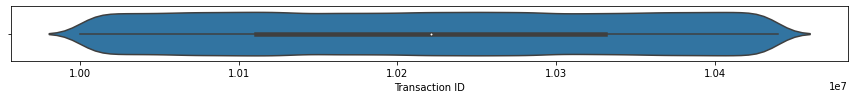

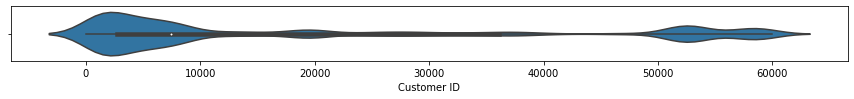

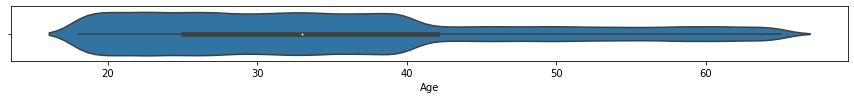

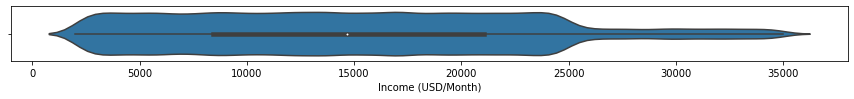

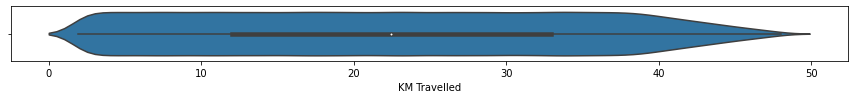

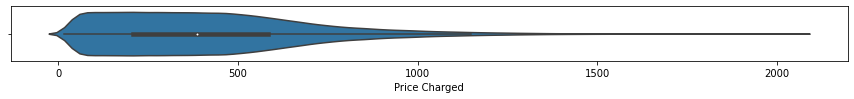

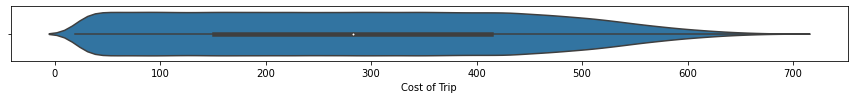

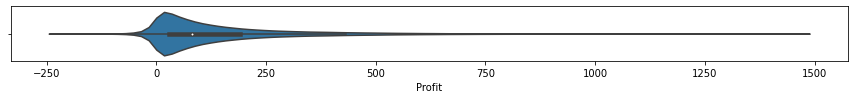

In [115]:
final_df.shape
final_df.dtypes
#Plot the violinplot for each numerical column to find the outliers
df_plot=final_df.select_dtypes(exclude=['object','datetime'])
df_plot.dtypes
for column in df_plot:
        plt.figure(figsize=(15,1))
        sns.violinplot(data=df_plot, x = column)

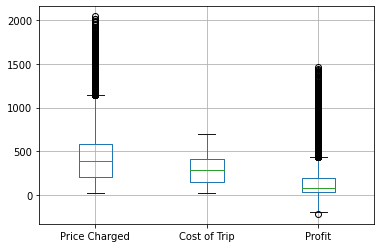

In [116]:
#Plot the boxplot for Price charged, Cost of Trip and Profit to find the outliers
box_plot = final_df.boxplot(column=['Price Charged','Cost of Trip', 'Profit'])

In [117]:
#Calculate the 50th and 95th percentile for Price Charged
print("The 50th percentile value is ", final_df['Price Charged'].quantile(0.50)) 

print("The 95th percentile value is ", final_df['Price Charged'].quantile(0.95)) 

final_df['Price Charged'] = np.where(final_df['Price Charged'] > 944, 386, final_df['Price Charged'])

final_df.describe()

The 50th percentile value is  386.36
The 95th percentile value is  944.89


,Transaction ID,Customer ID,Age,Income (USD/Month),KM Travelled,Price Charged,Cost of Trip,Profit
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,19191.652115,35.336705,15048.822937,22.567254,386.693525,286.190113,137.253198
std,1.268058e+05,21012.412463,12.594234,7969.409482,12.233526,220.566582,157.993661,160.311840
min,1.000001e+07,1.000000,18.000000,2000.000000,1.900000,15.600000,19.000000,-220.060000
25%,1.011081e+07,2705.000000,25.000000,8424.000000,12.000000,206.437500,151.200000,28.012000
50%,1.022104e+07,7459.000000,33.000000,14685.000000,22.440000,386.000000,282.480000,81.962000
75%,1.033094e+07,36078.000000,42.000000,21035.000000,32.960000,538.582500,413.683200,190.030000
max,1.044011e+07,60000.000000,65.000000,35000.000000,48.000000,943.960000,691.200000,1463.966000


In [118]:
#Calculate the 50th and 95th percentile for Cost of Trip

print("The 50th percentile value is ", final_df['Cost of Trip'].quantile(0.50)) 

print("The 95th percentile value is ", final_df['Cost of Trip'].quantile(0.95)) 

final_df['Cost of Trip'] = np.where(final_df['Cost of Trip'] > 544, 282, final_df['Cost of Trip'])

final_df.describe()

The 50th percentile value is  282.48
The 95th percentile value is  544.3632000000011


,Transaction ID,Customer ID,Age,Income (USD/Month),KM Travelled,Price Charged,Cost of Trip,Profit
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,19191.652115,35.336705,15048.822937,22.567254,386.693525,270.905275,137.253198
std,1.268058e+05,21012.412463,12.594234,7969.409482,12.233526,220.566582,142.132415,160.311840
min,1.000001e+07,1.000000,18.000000,2000.000000,1.900000,15.600000,19.000000,-220.060000
25%,1.011081e+07,2705.000000,25.000000,8424.000000,12.000000,206.437500,151.200000,28.012000
50%,1.022104e+07,7459.000000,33.000000,14685.000000,22.440000,386.000000,282.000000,81.962000
75%,1.033094e+07,36078.000000,42.000000,21035.000000,32.960000,538.582500,386.880000,190.030000
max,1.044011e+07,60000.000000,65.000000,35000.000000,48.000000,943.960000,543.840000,1463.966000


In [119]:
#Calculate the 50th and 95th percentile for Profit
print("The 50th percentile value is ", final_df['Profit'].quantile(0.50)) 

print("The 95th percentile value is ", final_df['Profit'].quantile(0.95)) 

final_df['Profit'] = np.where(final_df['Profit'] > 478, 81, final_df['Profit'])

final_df.describe()

The 50th percentile value is  81.96199999999999
The 95th percentile value is  478.56418


,Transaction ID,Customer ID,Age,Income (USD/Month),KM Travelled,Price Charged,Cost of Trip,Profit
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,19191.652115,35.336705,15048.822937,22.567254,386.693525,270.905275,110.102580
std,1.268058e+05,21012.412463,12.594234,7969.409482,12.233526,220.566582,142.132415,111.694376
min,1.000001e+07,1.000000,18.000000,2000.000000,1.900000,15.600000,19.000000,-220.060000
25%,1.011081e+07,2705.000000,25.000000,8424.000000,12.000000,206.437500,151.200000,28.012000
50%,1.022104e+07,7459.000000,33.000000,14685.000000,22.440000,386.000000,282.000000,81.000000
75%,1.033094e+07,36078.000000,42.000000,21035.000000,32.960000,538.582500,386.880000,159.894100
max,1.044011e+07,60000.000000,65.000000,35000.000000,48.000000,943.960000,543.840000,477.994000


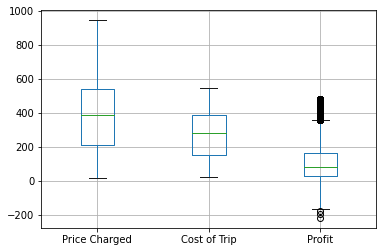

In [120]:
#Plot the boxplot for Price charged, Cost of Trip and Profit
boxplot = final_df.boxplot(column=['Price Charged','Cost of Trip', 'Profit'])

In [121]:
#Group year and company and count all users
final_df['Year'] = pd.DatetimeIndex(final_df['Date of Travel']).year
total_users = final_df.groupby(['Year','Company'])['Users'].count().reset_index(name='Total users')

In [122]:
#Transform Users column to string data type
final_df['Users'].astype(str)

0          24,701 
1          24,701 
2          24,701 
3          24,701 
4          24,701 
            ...   
359387     25,063 
359388     27,247 
359389      5,712 
359390      5,712 
359391      5,712 
Name: Users, Length: 359392, dtype: object

In [123]:
#Transform Users column to float data type and replace comma with space
final_df['Users'] = final_df["Users"].str.replace(',','').astype(float)

In [124]:
#Group year and company and count all users
total_users1 = final_df.groupby(['Year','Company'])['Users'].count().reset_index(name='Total Number of Users')

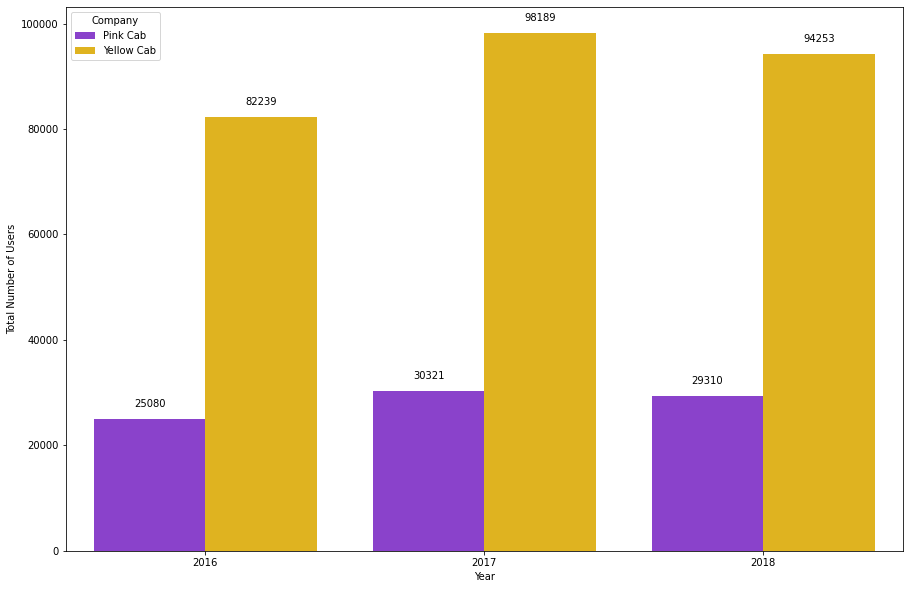

In [125]:
#Plot Total users for each year and company
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
df_plot1=total_users1
palette = sns.set_color_codes('bright')
chart = sns.barplot(x="Year", y='Total Number of Users', data=df_plot1, hue='Company', palette=['m','y'])

for c in chart.patches:
    chart.annotate("%.0f" % c.get_height(), (c.get_x() + c.get_width() / 2., c.get_height()),
        ha='center', va='center', fontsize=10, color='black', xytext=(0, 15),
        textcoords='offset points')

It can be observed from the above visualization that the Yellow cab company has more number of users in the years from 2016 to 2018 compared to that of the Pink cab Company

In [130]:
#Group Company and City and count the number of users
total_users2 = final_df.groupby(['Company','City'])['Users'].count().reset_index(name='Total Number of Users')
print(total_users2)

       Company            City  Total Number of Users
0     Pink Cab      ATLANTA GA                   1762
1     Pink Cab       AUSTIN TX                   1868
2     Pink Cab       BOSTON MA                   5186
3     Pink Cab      CHICAGO IL                   9361
4     Pink Cab       DALLAS TX                   1380
5     Pink Cab       DENVER CO                   1394
6     Pink Cab  LOS ANGELES CA                  19865
7     Pink Cab        MIAMI FL                   2002
8     Pink Cab    NASHVILLE TN                   1841
9     Pink Cab     NEW YORK NY                  13967
10    Pink Cab   ORANGE COUNTY                   1513
11    Pink Cab      PHOENIX AZ                    864
12    Pink Cab   PITTSBURGH PA                    682
13    Pink Cab   SACRAMENTO CA                   1334
14    Pink Cab    SAN DIEGO CA                  10672
15    Pink Cab      SEATTLE WA                   2732
16    Pink Cab  SILICON VALLEY                   3797
17    Pink Cab       TUCSON 

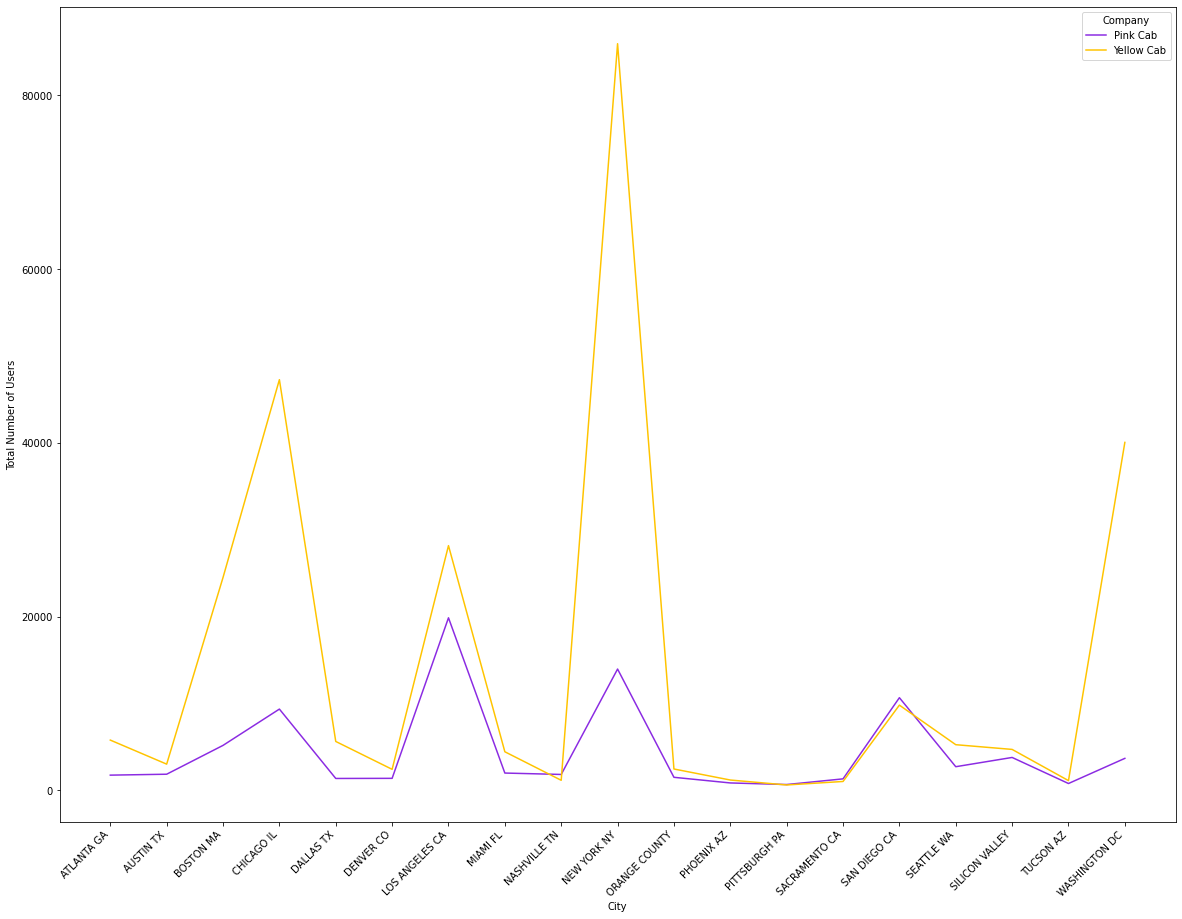

In [149]:
#Plot Total users for each city and company
fig_dims = (20, 15)
fig, ax = plt.subplots(figsize=fig_dims)
df_plot2=total_users2
palette = sns.set_color_codes('bright')
chart = sns.lineplot(x='City', y='Total Number of Users', data=df_plot2, hue='Company', palette=['m','y'])
plt.xticks(rotation=45, ha='right')

for c in chart.patches:
    chart.annotate("%.0f" % c.get_height(), (c.get_x() + c.get_width() / 2., c.get_height()),
        ha='center', va='center', fontsize=10, color='black', xytext=(0, 20),
        textcoords='offset points')

Yellow cab company has more number of users in the Newyork City.

In [150]:
#Create age groups.Group Company and Agegroups and sum all profit
bins= [18,25,40,60,100]
labels = ['18-25','26-40','41-60','60+']
final_df['Agegroup'] = pd.cut(final_df['Age'], bins=bins, labels=labels)
profit = final_df.groupby(['Company','Agegroup'])['Profit'].sum().reset_index(name='Total profit')

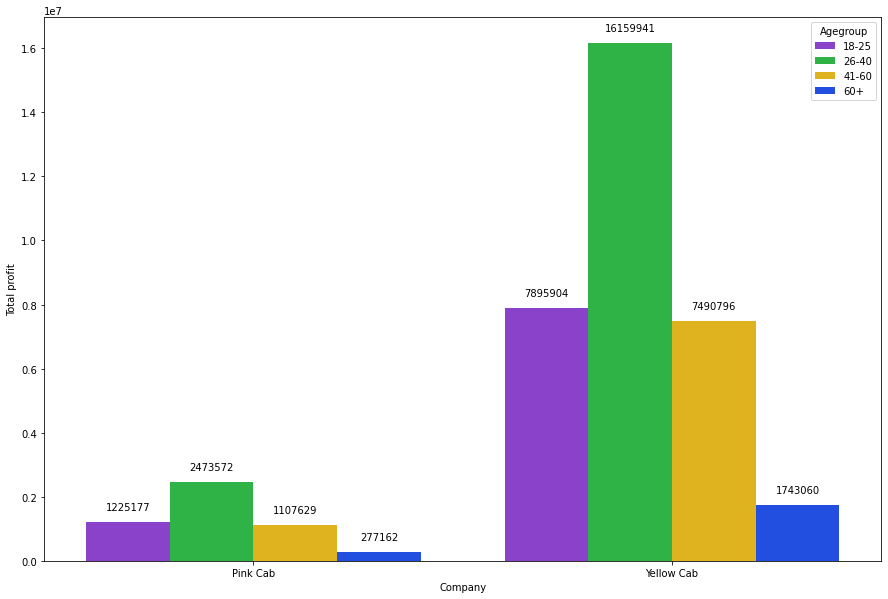

In [159]:
#Plot Total profit for each company and agegroup 
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
df_plot3= profit
palette = sns.set_color_codes('bright')
chart = sns.barplot(x="Company", y='Total profit', data=df_plot3, hue='Agegroup', palette=['m','g','y','b'])

for c in chart.patches:
    chart.annotate("%.0f" % c.get_height(), (c.get_x() + c.get_width() / 2., c.get_height()),
        ha='center', va='center', fontsize=10, color='black', xytext=(0, 15),
        textcoords='offset points')